In [3]:
import networkx as nx
with open('C:\\Users\\Mya\\Downloads\\twitter_combined.txt') as file:
    data = file.readlines()
    data = [i.rstrip() for i in data]
    print(len(data))
    data = [i.split(' ') for i in data]

def deg_ratio(outd, ind):
    degr = (outd + 1) / (ind + 1)
    return degr

def cop_scr(outd, ind):
    cop = outd - ind
    return cop 

# add edges
G = nx.DiGraph()
for i in range(len(data)):
    data[i][0]=int(data[i][0])
    data[i][1]=int(data[i][1])
    G.add_edge(data[i][0],data[i][1])
    
# get all nodes
noodes = list(G.nodes())

# create dictionary: keys = nodes, values = outdegree, indegree, degree ratio, copeland score
diction = {}
for i in range(len(noodes)):
    diction[noodes[i]]=[G.out_degree(noodes[i]),G.in_degree(noodes[i])]

for node in diction:
    diction[node].append(deg_ratio(diction[node][0],diction[node][1]))
    diction[node].append(cop_scr(diction[node][0],diction[node][1]))

# check length dictionary equal num nodes 
print(len(noodes))
print(len(diction))

2420766
81306
81306


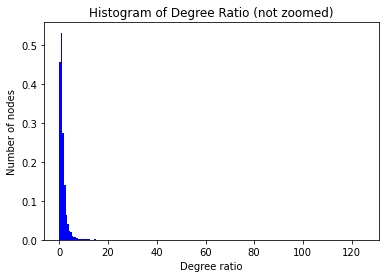

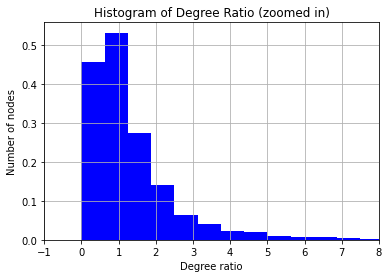

125.0


In [42]:
import matplotlib.pyplot as plt
degree_ratio = [diction[i][2] for i in diction]

plt.hist(degree_ratio, bins=200, density=True, facecolor='b')
plt.xlabel('Degree ratio')
plt.ylabel('Number of nodes')
plt.title('Histogram of Degree Ratio (not zoomed)')
plt.show()

y1,x1,_1 = plt.hist(degree_ratio, bins=200, density=True, facecolor='b')
plt.xlabel('Degree ratio')
plt.ylabel('Number of nodes')
plt.title('Histogram of Degree Ratio (zoomed in)')
plt.xlim(-1,8)
plt.grid(True)
plt.show()

print(x1.max())


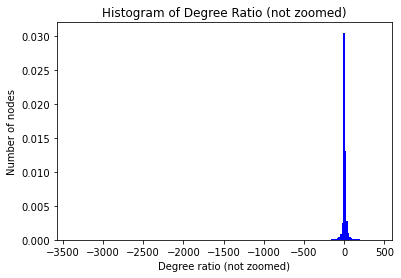

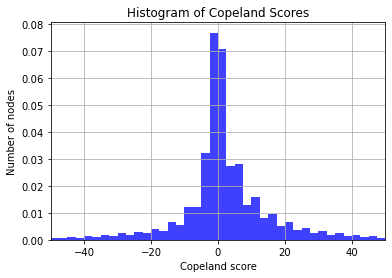

In [43]:
copeland_score = [diction[i][3] for i in diction]

plt.hist(copeland_score, bins=200, density=True, facecolor='b')
plt.xlabel('Degree ratio (not zoomed)')
plt.ylabel('Number of nodes')
plt.title('Histogram of Degree Ratio (not zoomed)')
plt.show()

bins2 = [i*2.5 for i in range(-160,160)]
y2,x2,_2 = plt.hist(copeland_score, bins=bins2, density=True, facecolor ='b', alpha=0.75)
plt.xlabel('Copeland score')
plt.ylabel('Number of nodes')
plt.title('Histogram of Copeland Scores')
plt.xlim(-50, 50)
plt.grid(True)
plt.show()



In [47]:
from math import sqrt
# create dictionary of top copeland score nodes
cop_scr = copeland_score
cop_scr = list(reversed(sorted(cop_scr)))
cop_scr = [cop_scr[i] for i in range(100)]

top_cop={}
for node in diction:
    for val in cop_scr:
        if diction[node][3] == val:
            top_cop[node] = diction[node]
topdegR = [top_cop[node][2] for node in top_cop]
topcop = [top_cop[node][3] for node in top_cop]


# calculate mean

def get_mean(mylist):
    _mean = sum(mylist)/len(mylist)
    return _mean

mean_degR = get_mean(topdegR)
mean_cop = get_mean(topcop)
print('Mean degree ratio: %.3f' %(mean_degR))
print('Mean Copeland score: %.1f' % (mean_cop))
        
# calculate median

def get_median(mylist):
    mylist = sorted(mylist)
    midnum = len(mylist)//2-1
    if len(mylist) %2 == 0:
        _median = (mylist[midnum] + mylist[midnum+1])/2
    else:
        _median = mylist[midnum+1]
    return _median
    
print('Median degree ratio: %.3f' %(get_median(topdegR)))
print('Median Copeland score: %.1f' %(get_median(topcop)))


# calculate standard deviation

def get_stand_dev(mylist, mean):
    _difsum = 0
    for val in mylist:
        _difsum += (val - mean) ** 2
    _stddev = sqrt(_difsum/len(mylist))
    return _stddev

stddev_degR = get_stand_dev(topdegR, mean_degR)
stddev_cop = get_stand_dev(topcop, mean_cop)
print('Degree ratio standard deviation: %.3f' %(stddev_degR))
print('Copeland score standard deviation:%.3f' %(stddev_cop))

Mean degree ratio: 38.684
Mean Copeland score: 224.6
Median degree ratio: 21.905
Median Copeland score: 221.0
Degree ratio standard deviation: 37.191
Copeland score standard deviation:21.952


In [45]:
testlist =[7, 9, 10, 12, 12, 13, 13, 13, 15, 15, 16, 16, 18, 18, 22, 23, 24, 24, 25, 37, 45, 76, 99]
# test mean
print(get_mean(testlist))
#test median
print(get_median(testlist))
# test standard deviation 
print(get_stand_dev(testlist, get_mean(testlist)))


24.434782608695652
16
21.53223283915761


In [46]:
# testing max min val for graph bounds
print('max cop', max(copeland_score))
print('min cop', min(copeland_score))
print('max degr', max(degree_ratio))
print('min degr', min(degree_ratio))

# test if graph legit
print('copeland scores and # nodes')
for i in range(-10,10):
    if copeland_score.count(i) != 0:
        print(i, copeland_score.count(i))



max cop 401
min cop -3382
max degr 125.0
min degr 0.000591016548463357
copeland scores and # nodes
-10 713
-9 803
-8 947
-7 1063
-6 1372
-5 1586
-4 2056
-3 2904
-2 4732
-1 10834
0 6218
1 4557
2 3565
3 3001
4 2572
5 2180
6 1819
7 1694
8 1383
9 1261
